In [5]:
#from threeML.io.download_from_http import ApacheDirectory
%matplotlib notebook

import numpy as np

from jupyterthemes import jtplot
jtplot.style('oceans16', context='notebook', fscale=1)
import matplotlib.pyplot as plt

from gbm_pca_background import CSPECData



In [2]:
tt = CSPECData('glg_cspec_n8_120318_v00.pha')

/Users/jburgess/.environs/3ml/lib/python2.7/site-packages/gbm_pca_background/utils/poly_fitting.py:164: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(err2)
/Users/jburgess/.environs/3ml/lib/python2.7/site-packages/gbm_pca_background/cspec_data.py:240: RuntimeWarning: invalid value encountered in greater
  if np.any(np.abs(all_sig) > sig_threshold):


In [3]:
tt2 = CSPECData('glg_cspec_n4_120304_v00.pha')

<IPython.core.display.Javascript object>


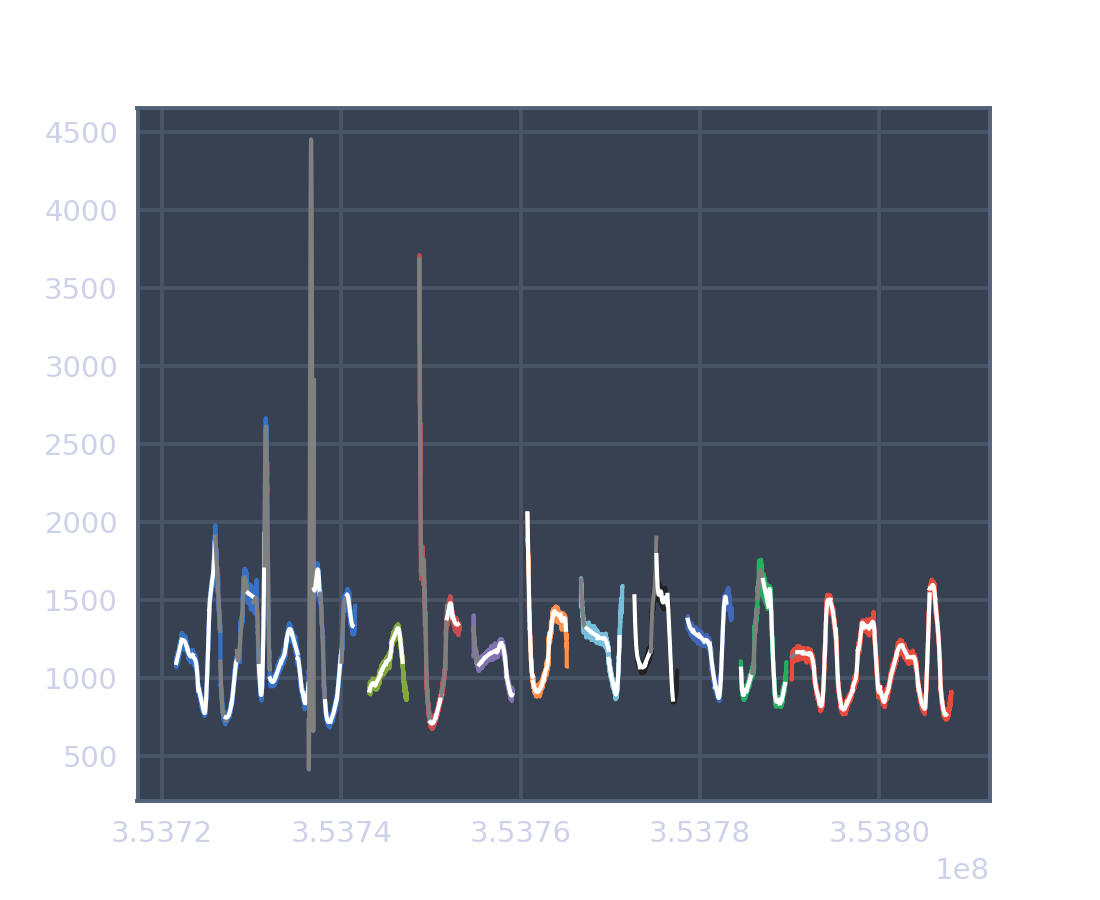

In [4]:
tt.plot_all(show_bad=False,show_poly=True)

<IPython.core.display.Javascript object>


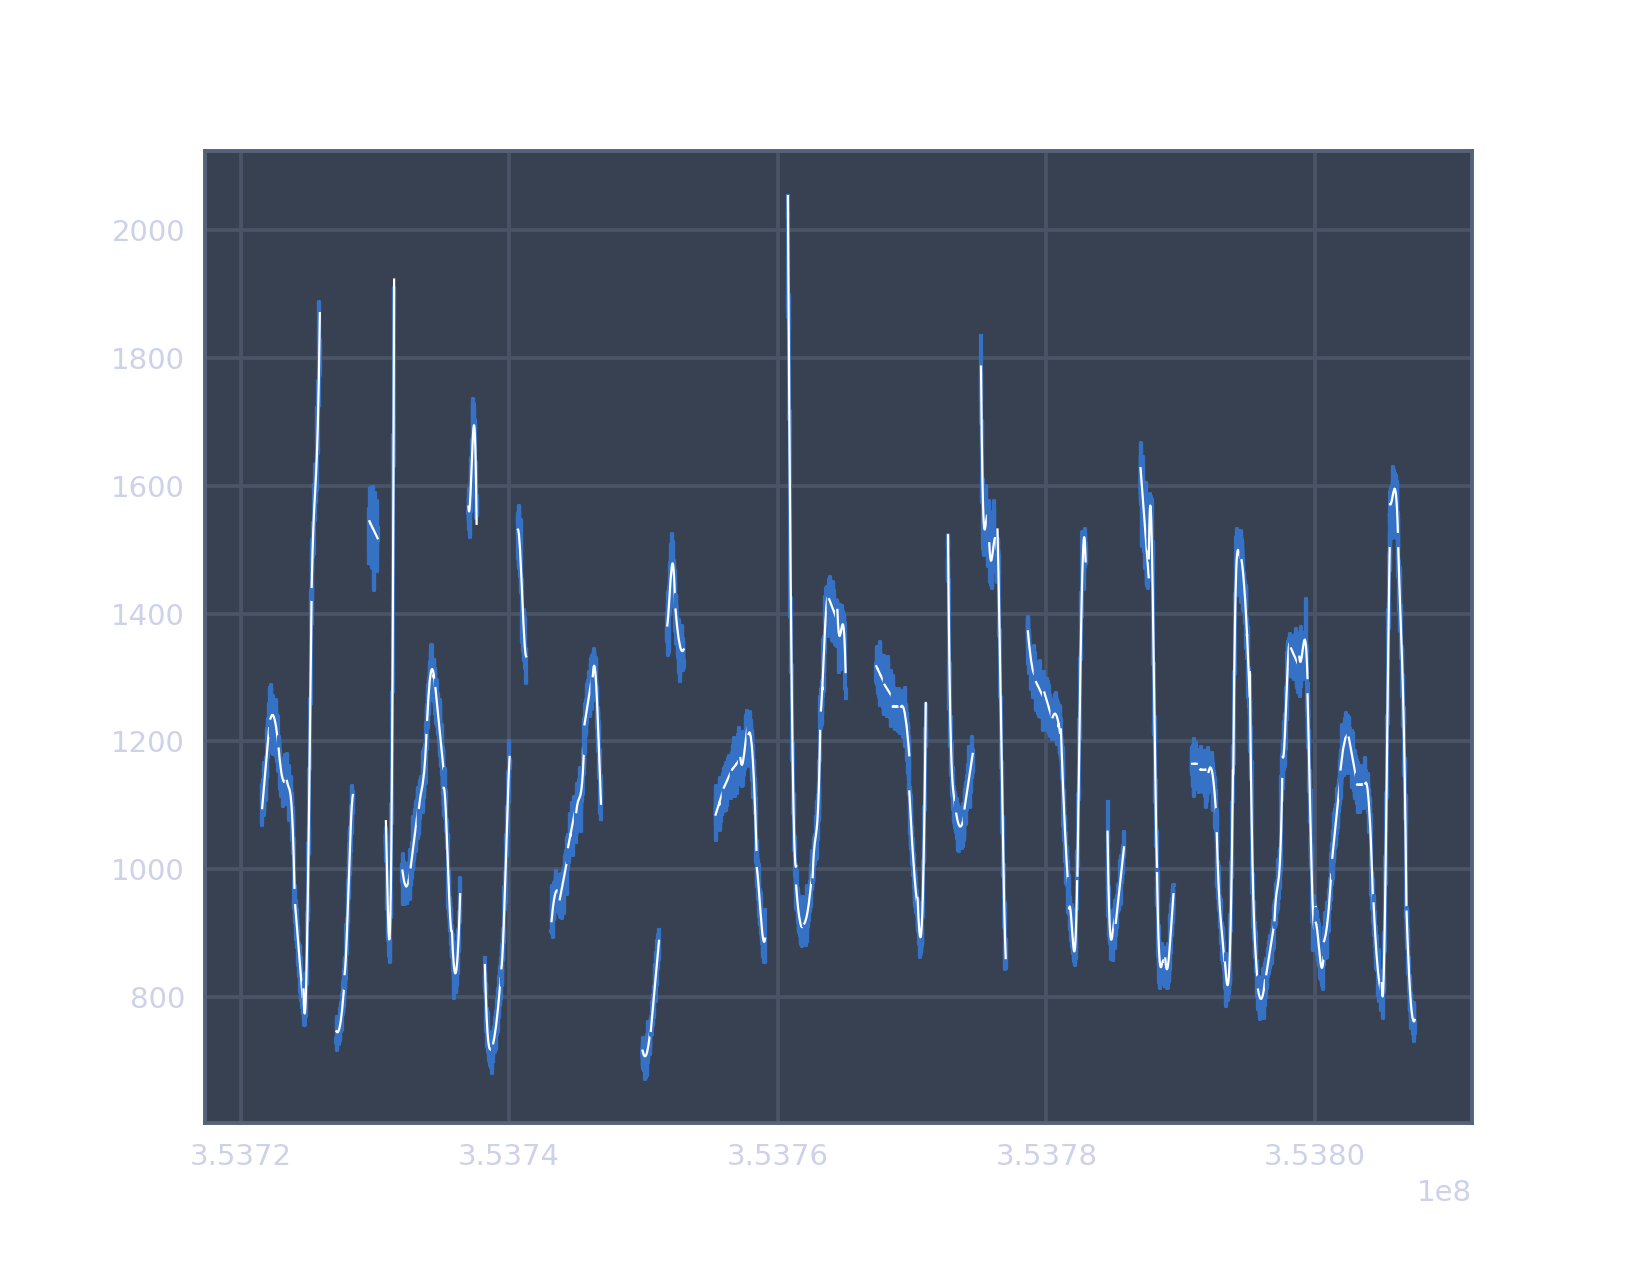

In [7]:
tt.plot_good()

<IPython.core.display.Javascript object>


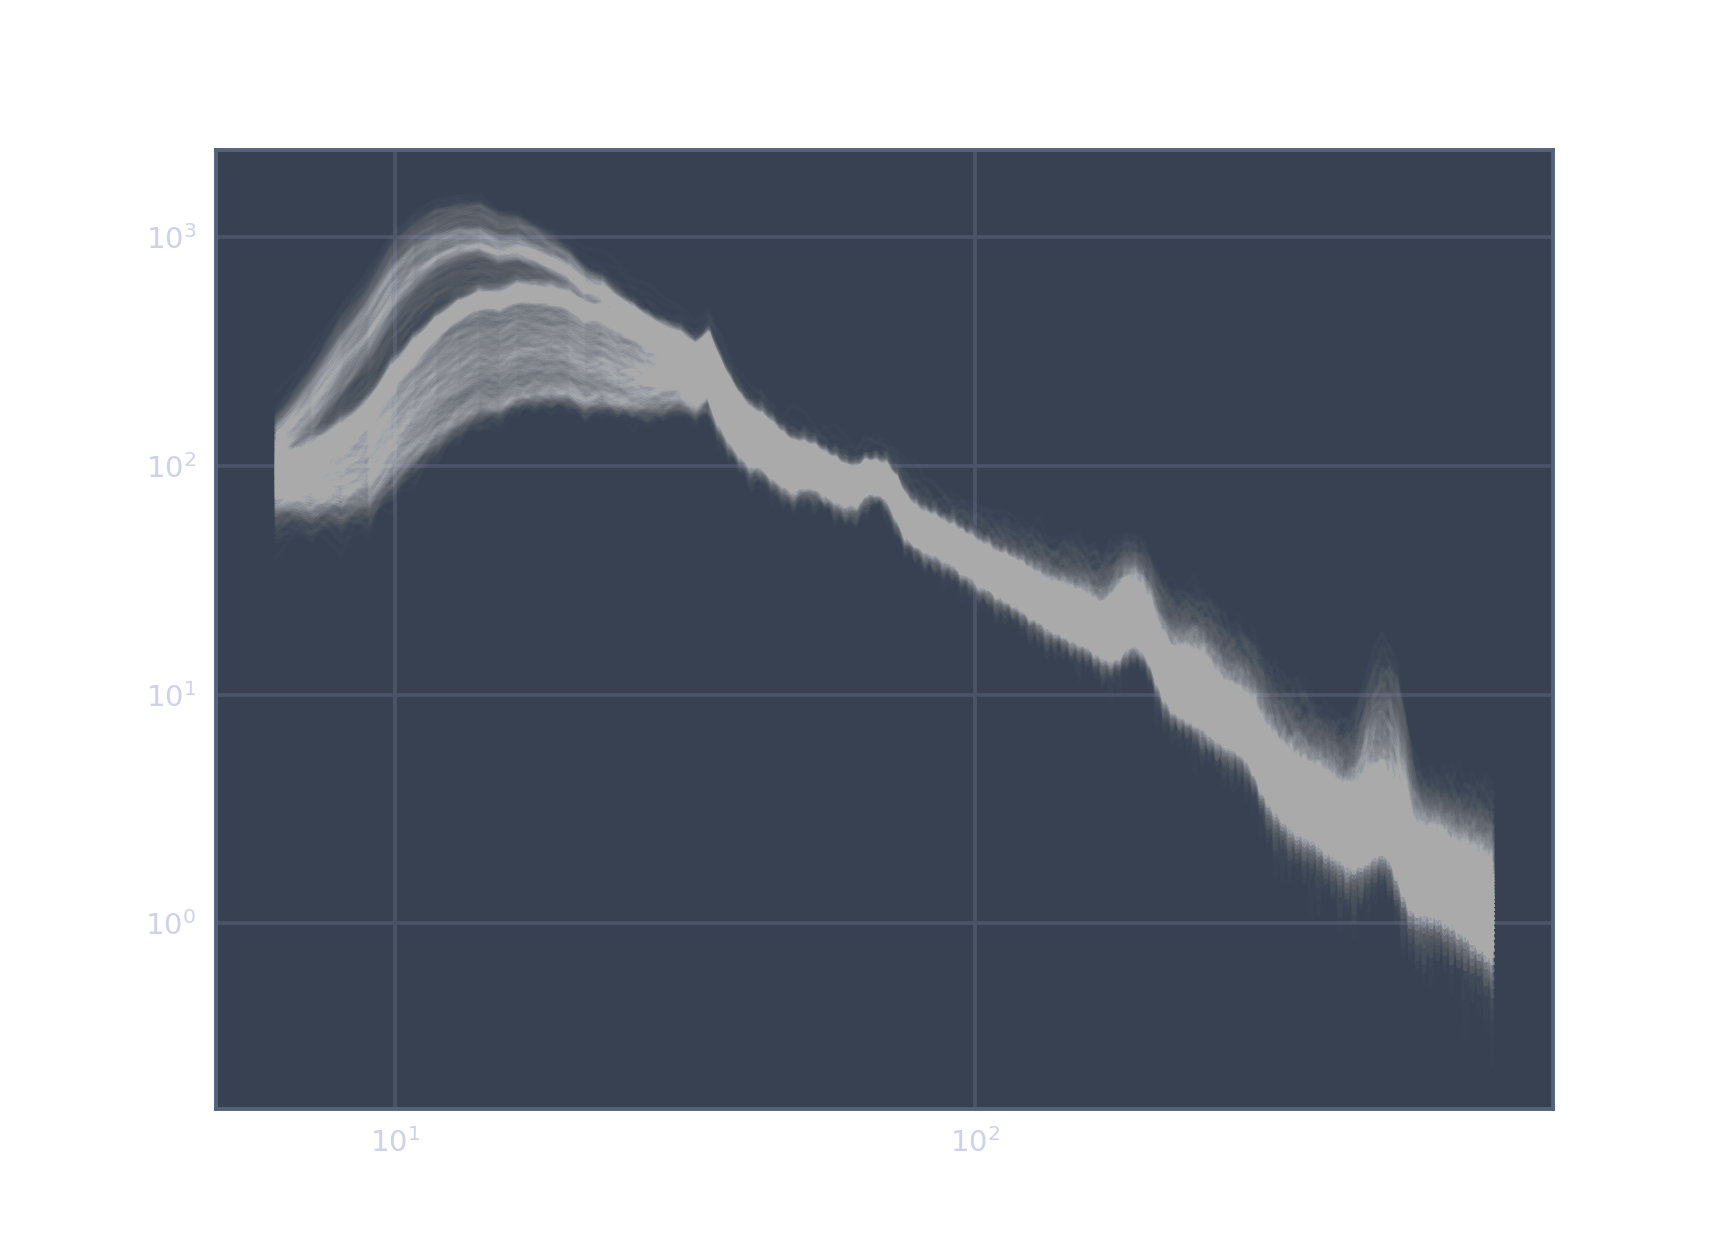

In [6]:
fig, ax = plt.subplots()

for spec in tt.spectra:
    
    
    ax.loglog(tt.channel_centers[1:120],spec[1:120]/ tt.channel_widths[1:120] ,alpha=0.01,color='w')


<IPython.core.display.Javascript object>


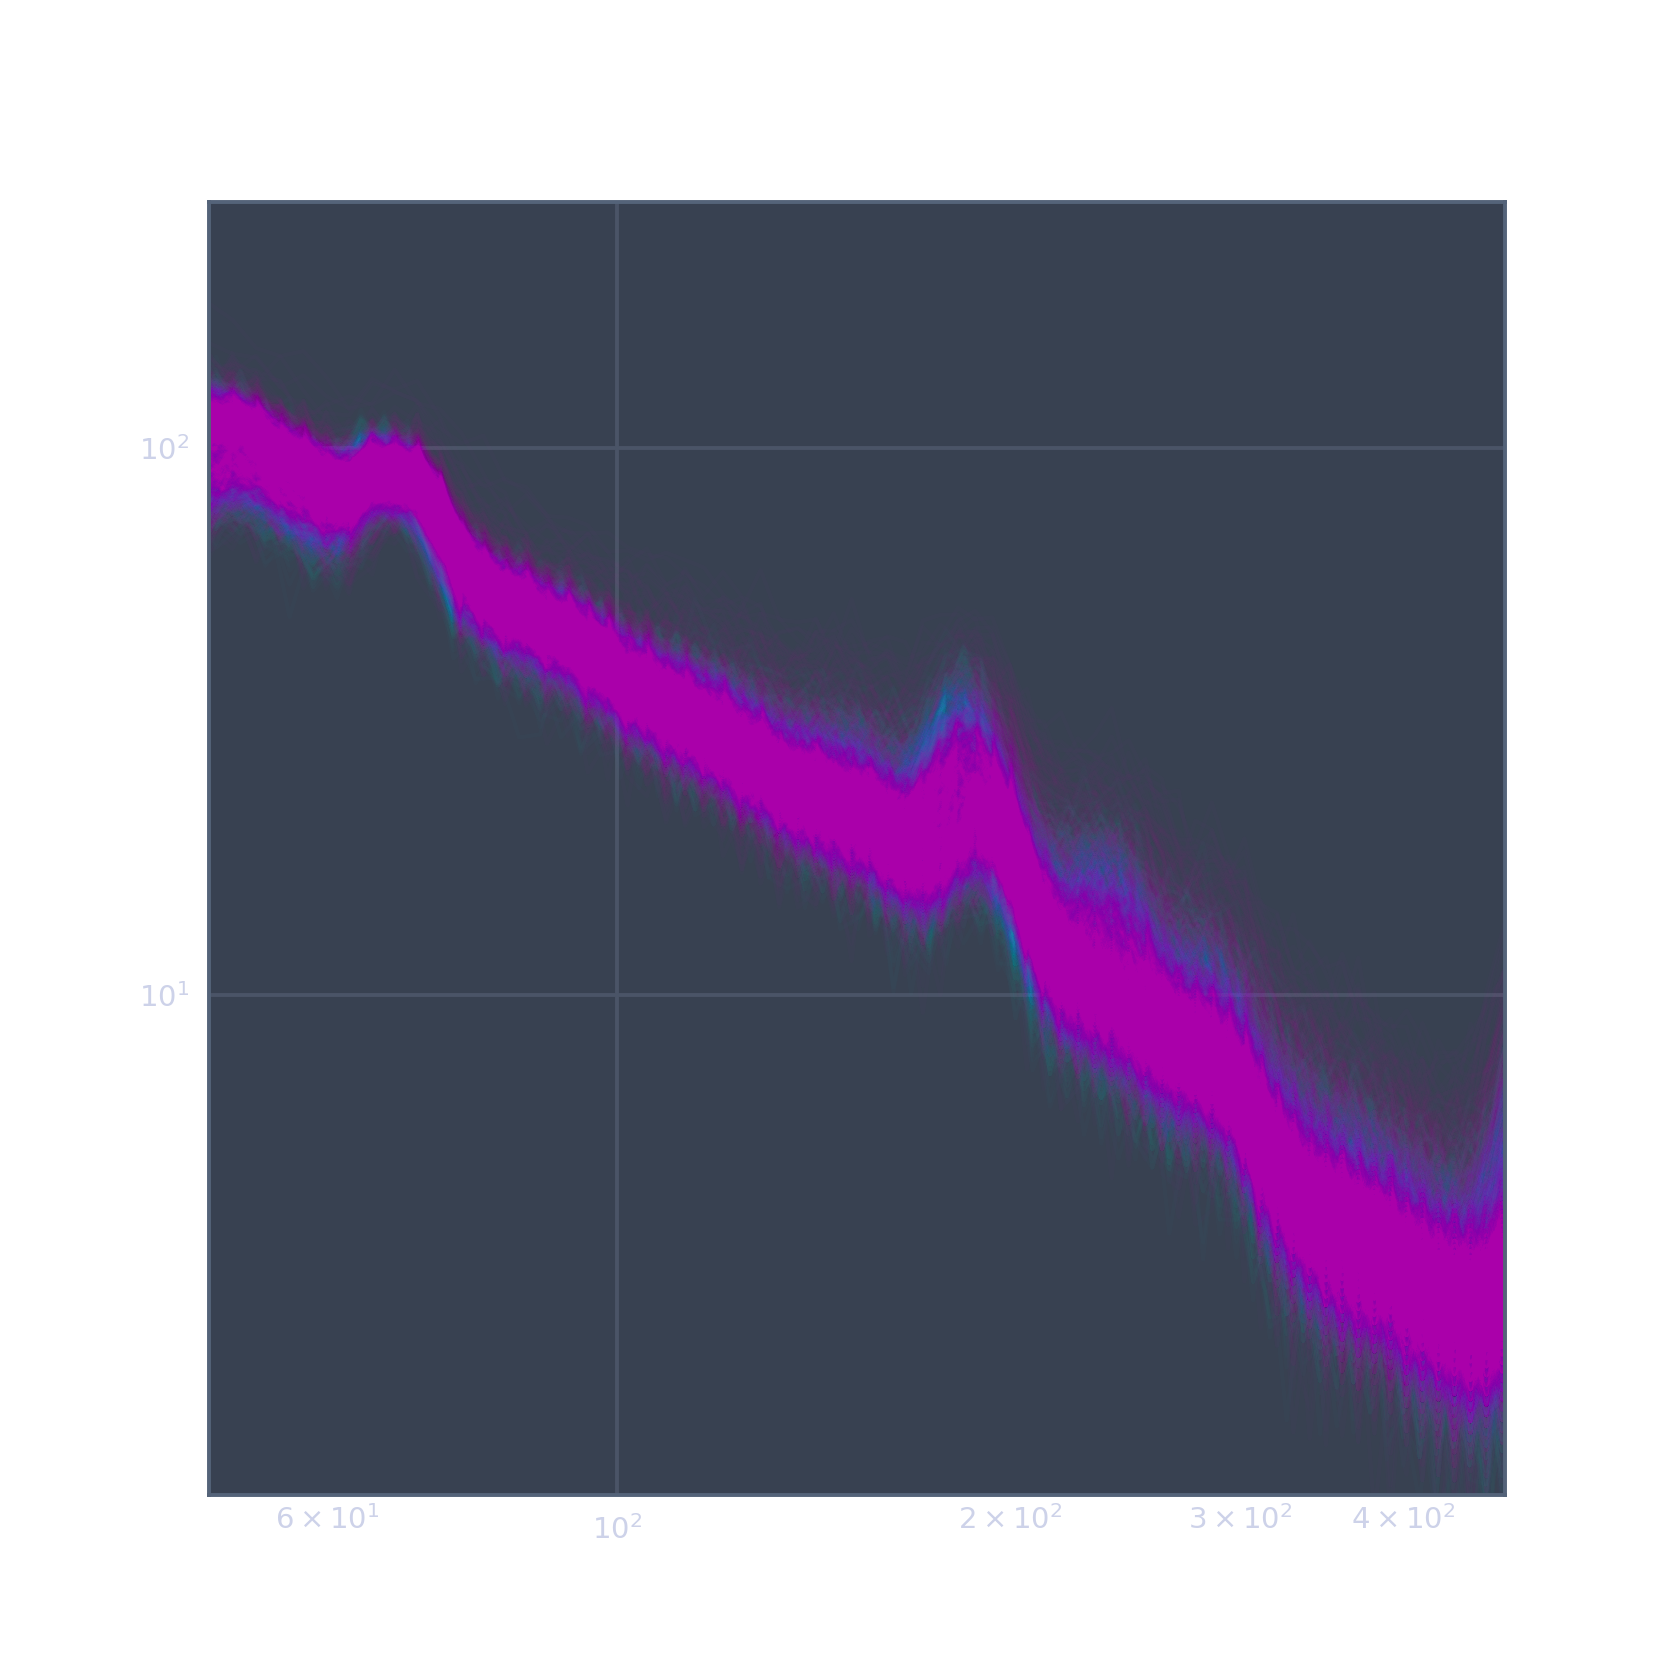

In [14]:
fig, ax = plt.subplots()

for spec in tt2.spectra:
    
    
    ax.loglog(tt2.channel_centers[1:120],spec[1:120]/ tt2.channel_widths[1:120] ,alpha=0.01,color='yellow')
    
    
for spec in tt.spectra:
    
    
    ax.loglog(tt.channel_centers[1:120],spec[1:120]/ tt.channel_widths[1:120] ,alpha=0.01,color='magenta')





<IPython.core.display.Javascript object>


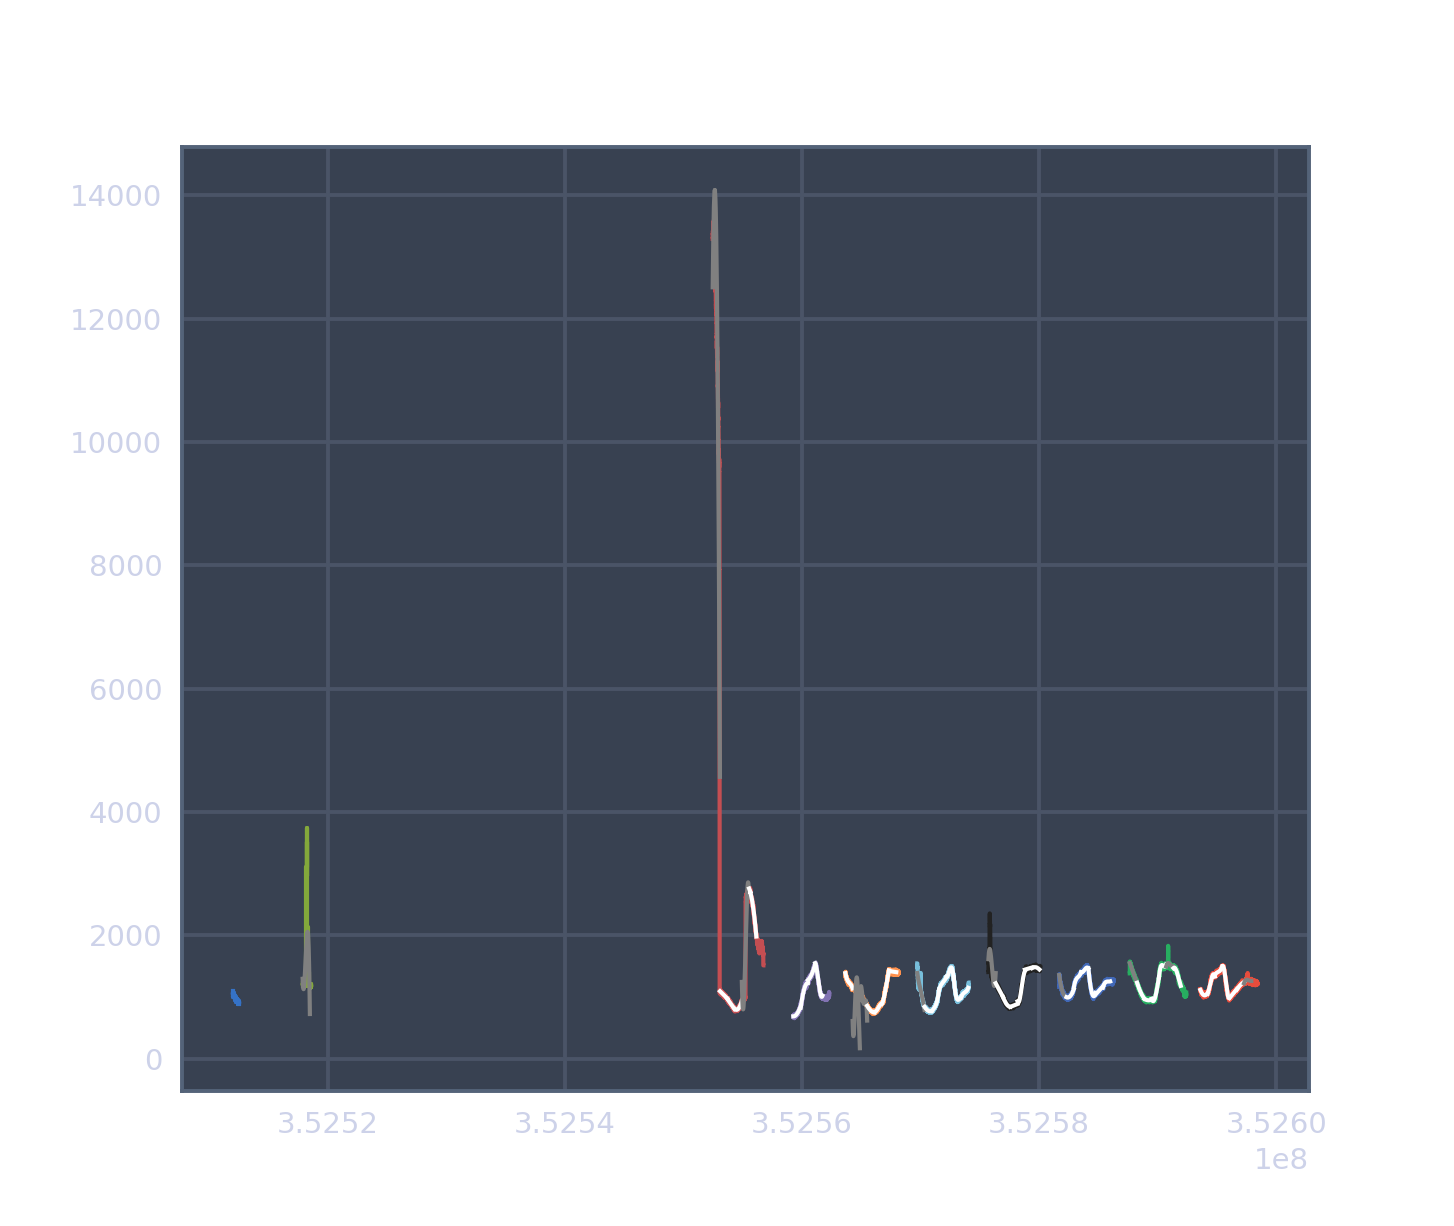

In [9]:
tt2.plot_all(show_bad=False,show_poly=True)

<IPython.core.display.Javascript object>


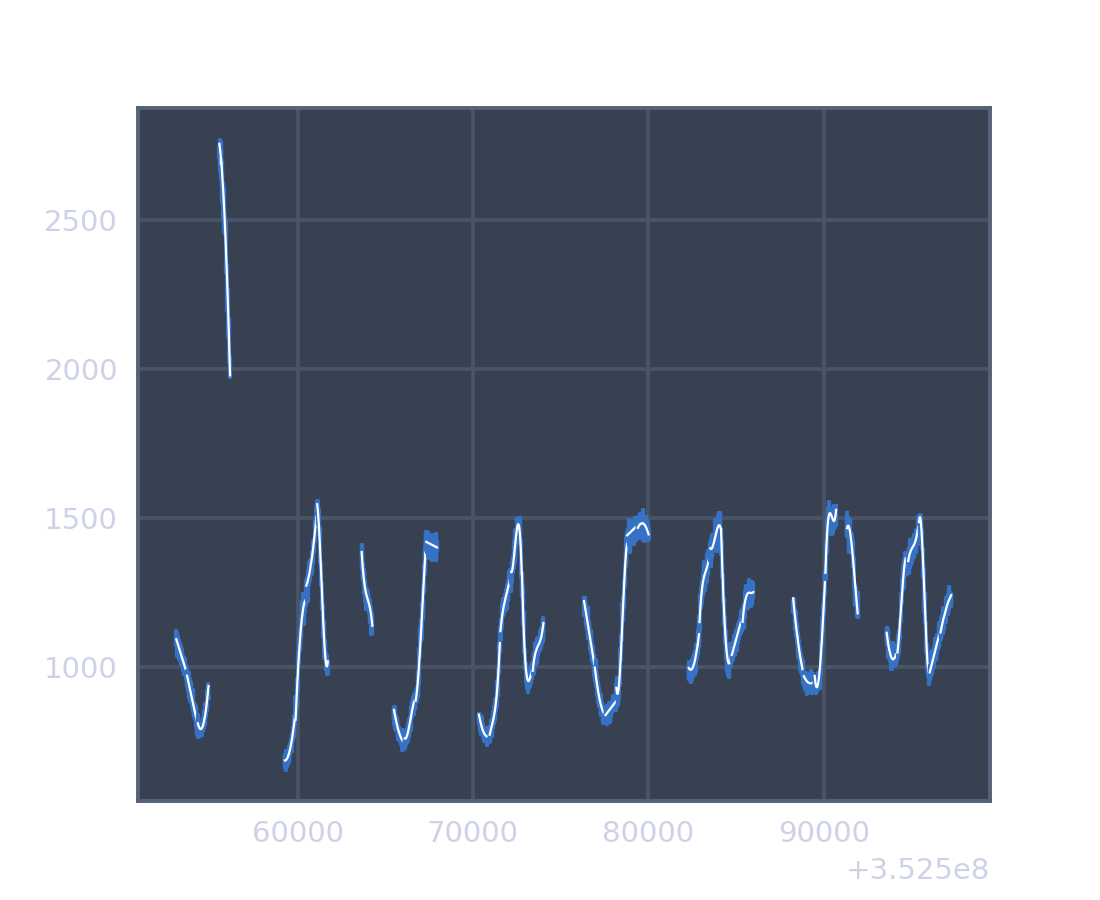

In [10]:
tt2.plot_good()

In [6]:
all_spectra = np.append(tt.spectra,tt2.spectra,axis=0)

In [7]:
from sklearn import preprocessing
X = preprocessing.normalize(all_spectra[:,1:120])
mu = X.mean(0)
std = X.std(0)

<IPython.core.display.Javascript object>


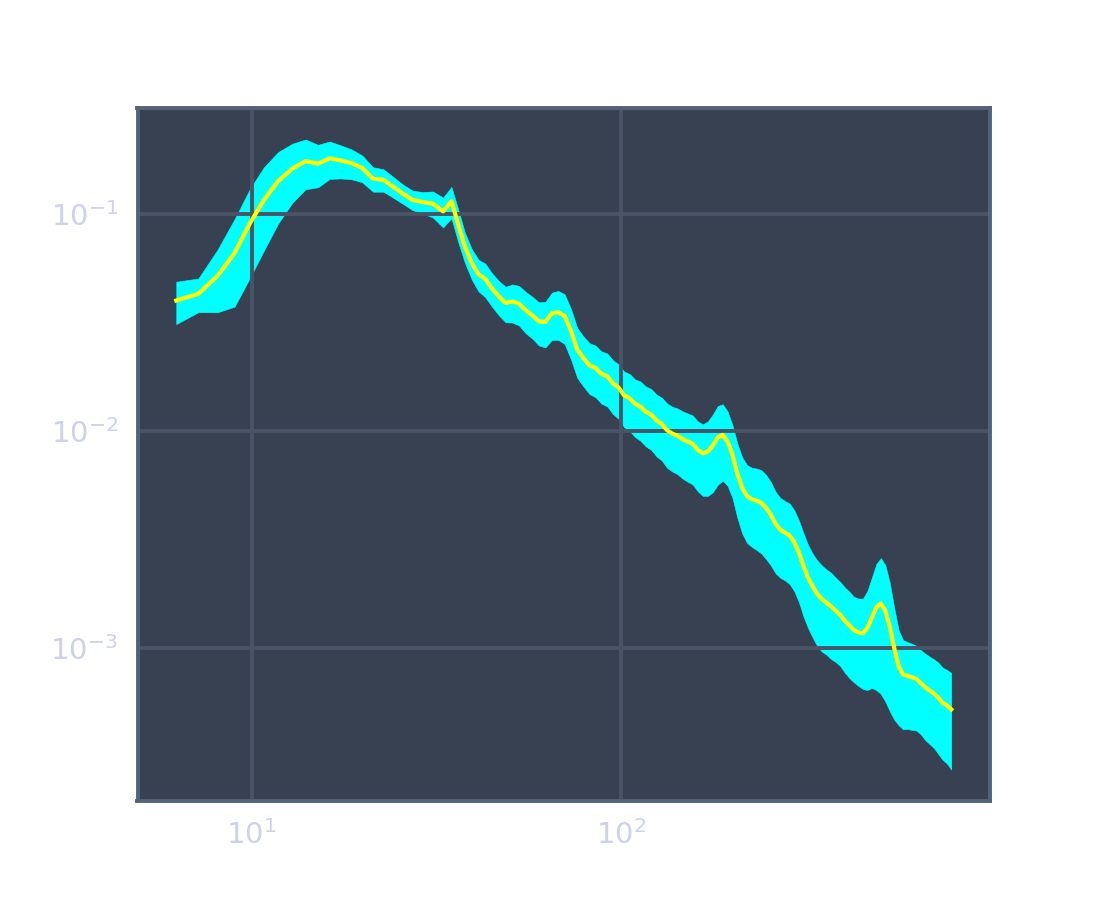

In [8]:
fig, ax = plt.subplots()


ax.loglog(tt.channel_centers[1:120] , mu/tt.channel_widths[1:120], color='yellow')
ax.fill_between(tt.channel_centers[1:120], (mu - std)/tt.channel_widths[1:120], (mu + std)/tt.channel_widths[1:120], color='cyan')

In [14]:
from sklearn.decomposition import PCA
ncomp = 3
pca = PCA(n_components=ncomp,svd_solver='randomized')
X_projected = pca.fit_transform(X)  # warning: this takes a long time!

<IPython.core.display.Javascript object>


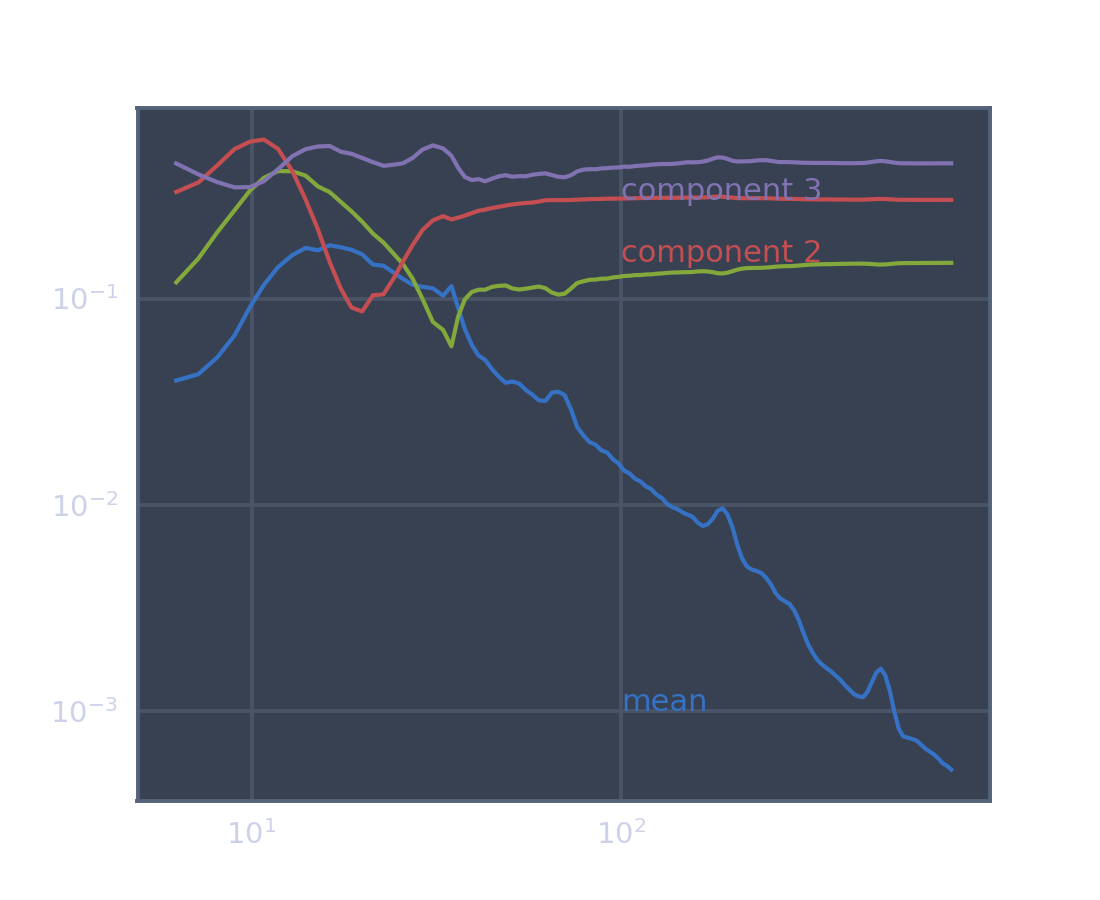

In [15]:
fig, ax = plt.subplots()

l = ax.loglog(tt.channel_centers[1:120], ((pca.mean_/tt.channel_widths[1:120])))
c = l[0].get_color()
ax.text(100, 1E-3, "mean", color=c)
for i in range(ncomp):
    l = ax.loglog(tt.channel_centers[1:120], ((pca.components_[i]/tt.channel_widths[1:120]) + 0.15 * (i+1)))
    c = l[0].get_color()
    ax.text(100, 0.15 * i, "component %i" % (i + 1), color=c)

In [17]:
from astromodels import *


Did you try to import pygsl in the build directory?

Well, that does not work out of the box. If you want to do that, please
use
      python setup.py build_ext -i
to add the necessary extension module in the local pygsl/ directory!

Please read the README first! Any further questions or missing information
please post to pygsl-discuss@lists.sourceforge.net!


In [26]:
Exponential_cutoff?

<IPython.core.display.Javascript object>


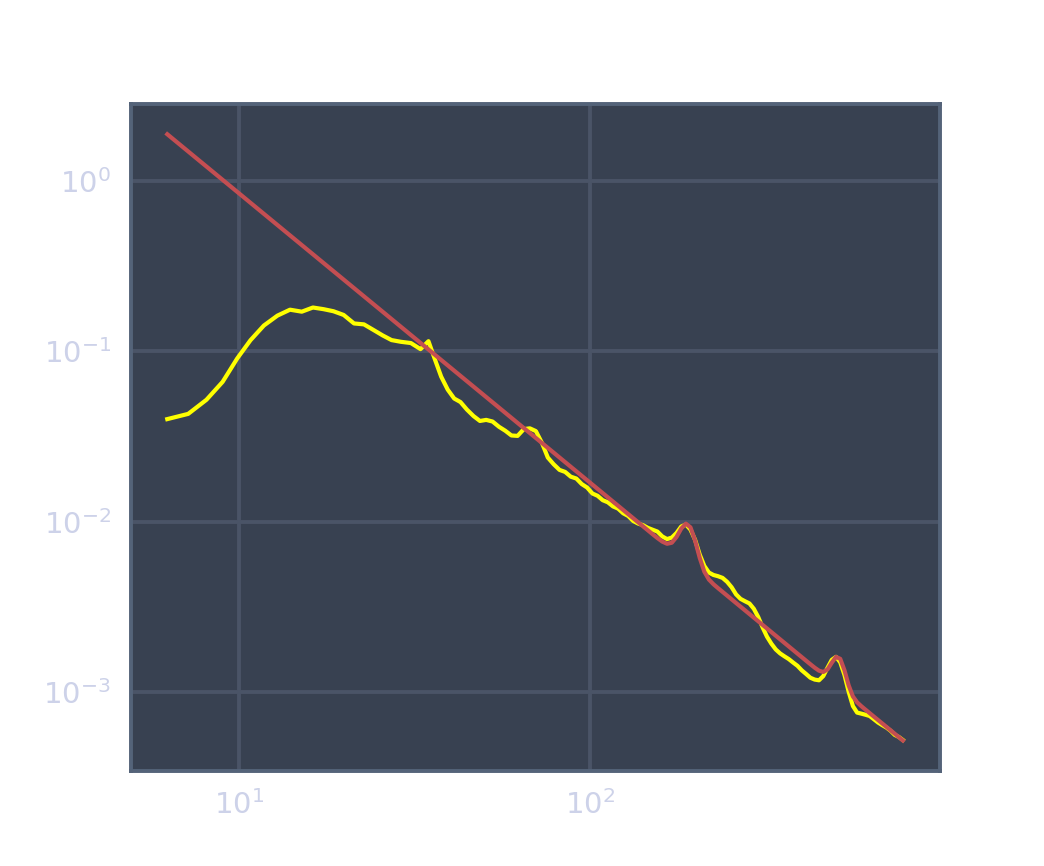

In [46]:
fig, ax = plt.subplots()

ec = Exponential_cutoff(K=1)
ec.xc.min_value = None
ec.xc=-10


func = Powerlaw(K=1.7E-2,piv=100,index=-1.7) + Gaussian(F=.03,sigma=22,mu=511) + Gaussian(F=.1,sigma=10,mu=190)



ax.loglog(tt.channel_centers[1:120] , mu/tt.channel_widths[1:120], color='yellow')
ax.loglog(tt.channel_centers[1:120],func(tt.channel_centers[1:120]),'r')

#ax.fill_between(tt.channel_centers[1:120], (mu - std)/tt.channel_widths[1:120], (mu + std)/tt.channel_widths[1:120], color='cyan')

In [14]:
main_url = 'https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/daily/'

main_apache = ApacheDirectory(main_url)

year_urls = main_apache.directories

for year in year_urls:
    
    this_year_url = "%s%s"%(main_url,year)
    
    year_apache = ApacheDirectory(this_year_url)
    
    month_urls = year_apache.directories
    
    for month in month_urls:
        
        this_month_url = "%s%s%s"%(main_url,year,month)
        
        month_apache = ApacheDirectory(this_month_url)
        
        day_urls = month_apache.directories
        
        
    
    
    
